In [1]:
%matplotlib inline
#
from LRGSG_package.shared import *
from LRGSG_package.config.utils import *
from LRGSG_package.LRGSG import gaussian_filter, Lattice2D, \
    read_files_to_2d_array, move_to_rootf
#
move_to_rootf(True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


### phtra plot

['ordParam', 'p=0.233', 'randZERR', 'na=10000.txt']
['ordParam', 'p=0.158', 'rand', 'na=10000.txt']
['ordParam', 'p=0.282', 'rand', 'na=10000.txt']
['ordParam', 'p=0.233', 'rand', 'na=10000.txt']
['ordParam', 'p=0.167', 'randZERR', 'na=10000.txt']
['ordParam', 'p=0.0727', 'randZERR', 'na=10000.txt']
['ordParam', 'p=0.0909', 'randZERR', 'na=10000.txt']
['ordParam', 'p=0.657', 'randXERR', 'na=10000.txt']
['ordParam', 'p=0.0182', 'randZERR', 'na=10000.txt']
['ordParam', 'p=0.434', 'randXERR', 'na=10000.txt']
['ordParam', 'p=0.148', 'rand', 'na=10000.txt']
['ordParam', 'p=0.239', 'rand', 'na=10000.txt']
['ordParam', 'p=0.121', 'rand', 'na=10000.txt']
['ordParam', 'p=0.0394', 'rand', 'na=10000.txt']
['ordParam', 'p=0.98', 'randXERR', 'na=10000.txt']
['ordParam', 'p=0.758', 'randXERR', 'na=10000.txt']
['ordParam', 'p=0.495', 'randXERR', 'na=10000.txt']
['ordParam', 'p=0.586', 'randXERR', 'na=10000.txt']
['ordParam', 'p=0.0636', 'rand', 'na=10000.txt']
['ordParam', 'p=0.0505', 'randXERR', 'na

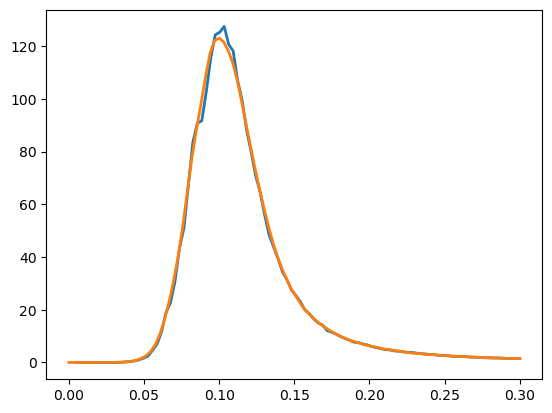

In [10]:
perc = pd.read_csv("/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/data/plot/tmp/OrderP_L64",
                       sep=',', header=None)
l = Lattice2D(64, geo='squared', 
            initNwDict=True, 
            with_positions=False,
            sgpath="plot/paper/suppinf/phase_transition_l2d/"
)
data = read_files_to_2d_array(l.phtrapath, 'rand')
data = data[np.argsort(data[:, 0])]
#
pinf2 = gaussian_filter(data[:, 5], sigma=2)
#
chi = gaussian_filter(data[:, 7]*l.N, sigma=1)
#
x_scaled = data[:, 0]
#
chi_scaled = gaussian_filter(perc[3]*64**2,sigma=0)

chiplot, = plt.plot(perc[5], chi_scaled,
                          lw=2, marker='')
chiplot, = plt.plot(x_scaled, chi,
                          lw=2, marker='')

### precision problems

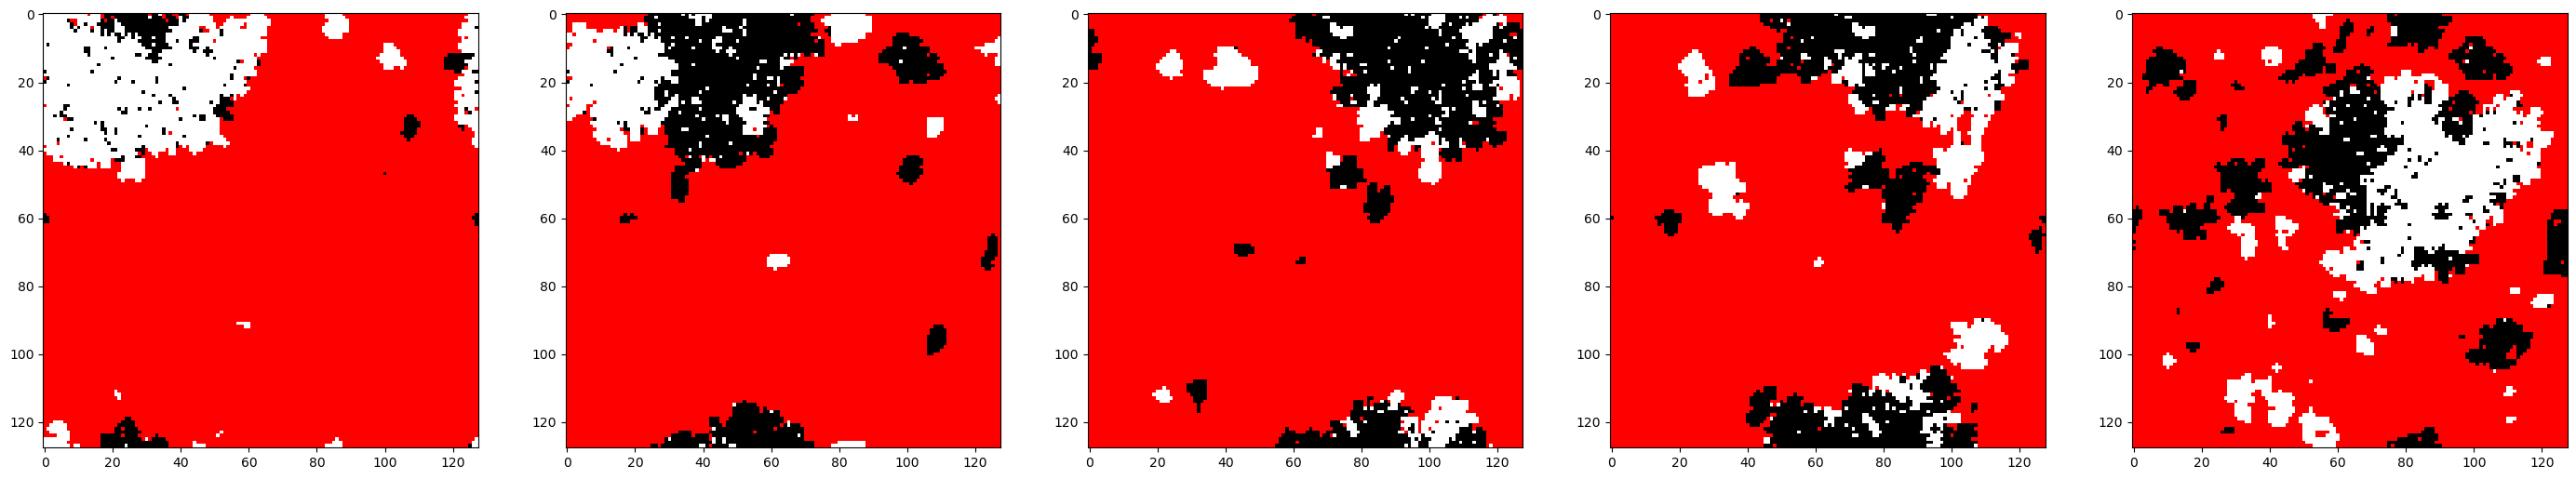

In [11]:
np.random.seed(0)
random.seed(0)
#
fig, ax = plt.subplots(ncols=5, nrows=5, figsize=(35, 7))
#
l = Lattice2D(128, pflip=0.103)
l.flip_random_fract_edges()
l.compute_k_eigvV(howmany=5, MODE_dynspec="scipy", typf=np.float32)
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['black', 'red', 'white'])
for i in range(5):
    ei = flip_to_positive_majority(l.eigV[i].reshape(l.syshape))
    result = sign_with_threshold(ei, threshold=1e-7)
    ax[i].imshow(result, cmap=cmap, interpolation=None)

np.random.seed(0)
random.seed(0)
l = Lattice2D(128, pflip=0.103)
l.flip_random_fract_edges()
l.compute_k_eigvV(howmany=5, MODE_dynspec="numpy", typf=np.float64)
for i in range(5,10):
    ei = flip_to_positive_majority(l.eigV[i].reshape(l.syshape))
    result = sign_with_threshold(ei, threshold=1e-15)
    ax[i].imshow(result, cmap=cmap, interpolation=None)

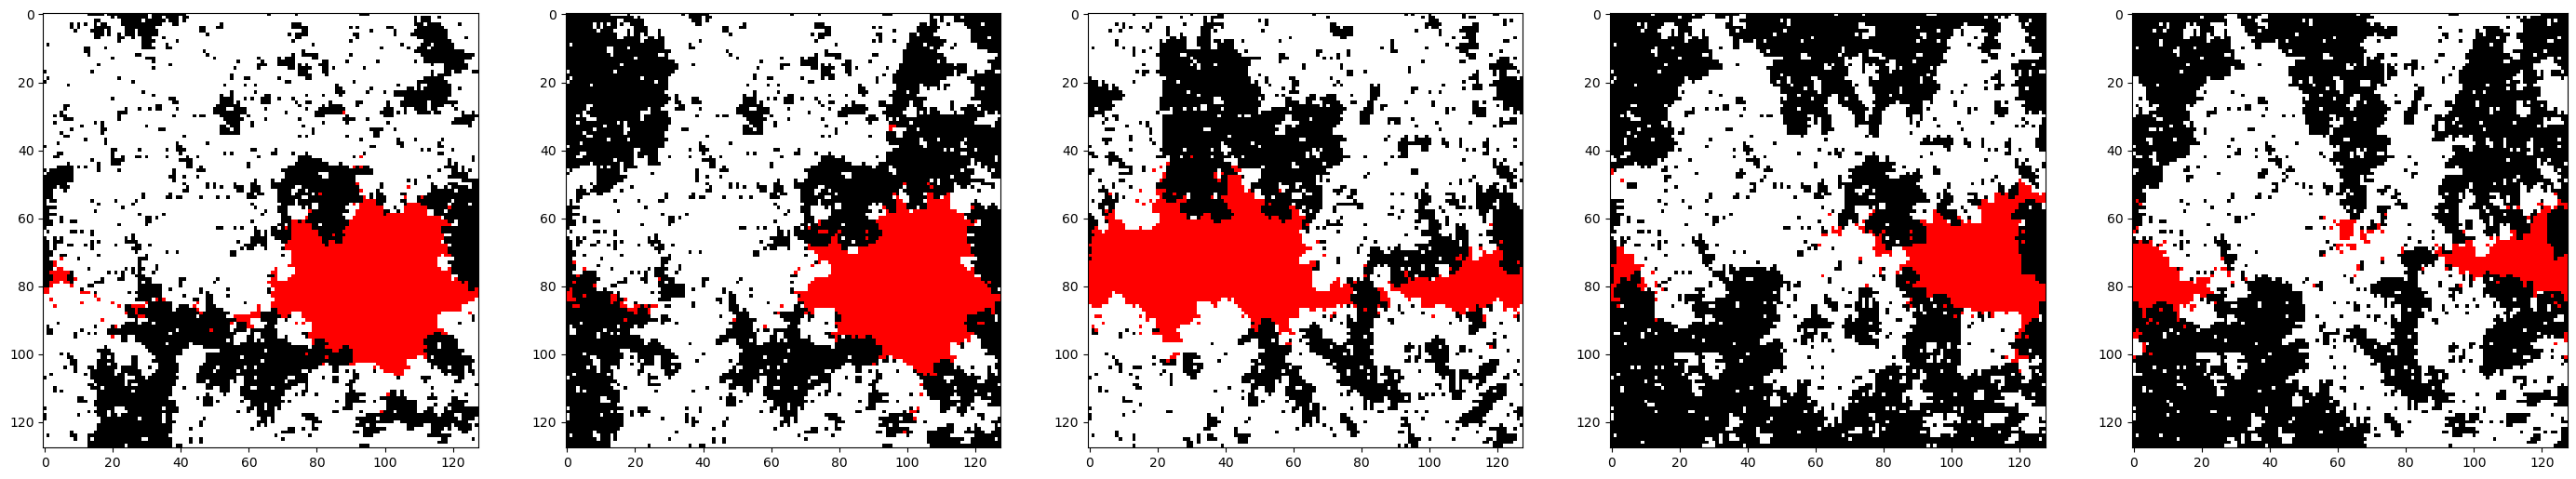

In [12]:
np.random.seed(0)
random.seed(0)
fig, ax = plt.subplots(ncols=5, figsize=(35,7))


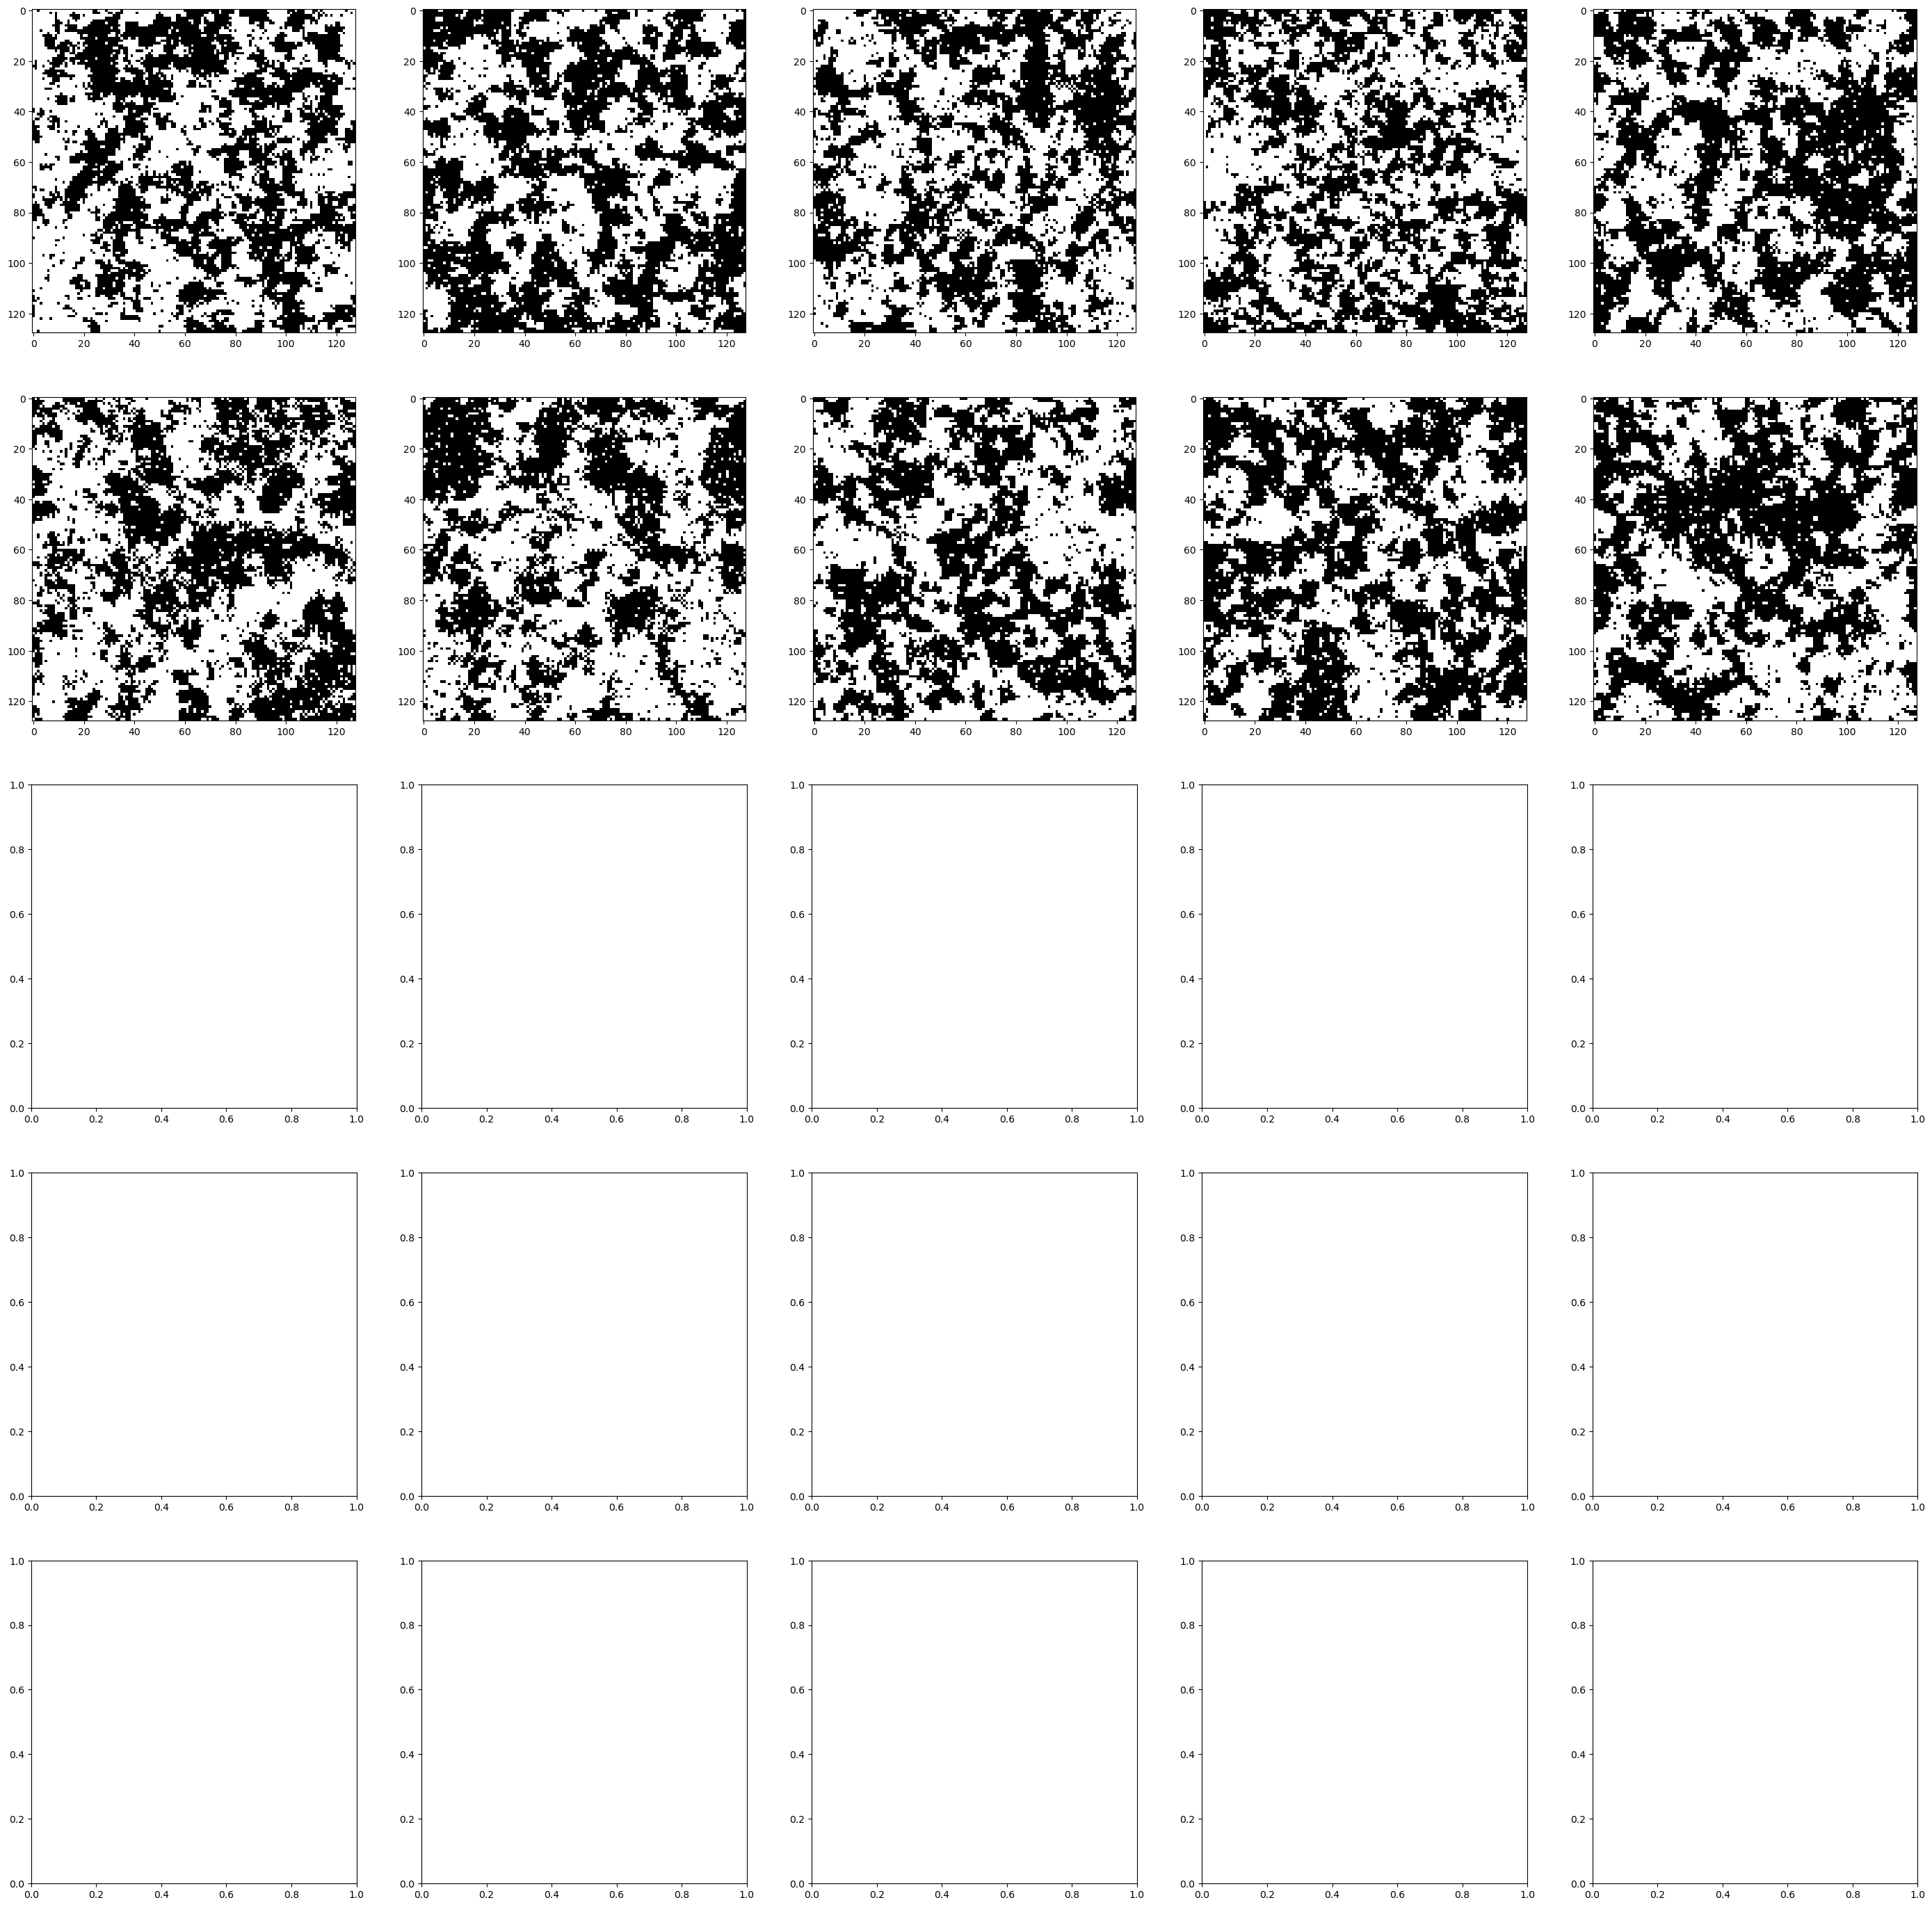

In [13]:
fig, ax = plt.subplots(ncols=5, nrows=5, figsize=(35,35))
for i in range(10):
    l = Lattice2D(128, pflip=0.12)
    l.flip_random_fract_edges()
    l.compute_k_eigvV(howmany=2)
    ei = l.eigV[0].reshape(l.syshape)
    result = sign_with_threshold(ei, threshold=1e-15)
    ax[i//5][i%5].imshow(result, cmap=cmap, interpolation=None)

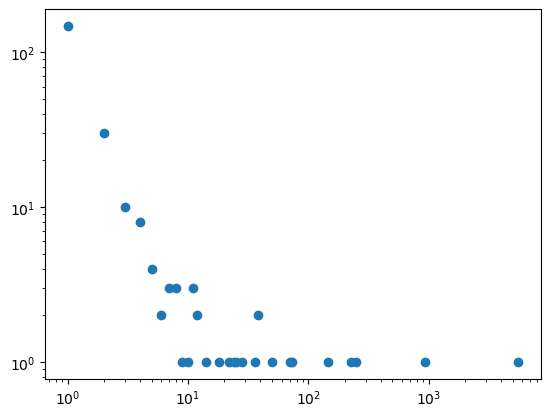

In [14]:
k, v = l.cluster_distribution_list().keys(), l.cluster_distribution_list().values()
plt.plot(k, v, marker='o', lw=0)
plt.yscale('log')
plt.xscale('log')

### Distribution of values first eigenstate

In [4]:
%matplotlib inline
#
from LRGSG_package.shared import *
from LRGSG_package.config.utils import *
from LRGSG_package.LRGSG import gaussian_filter, Lattice2D, \
    read_files_to_2d_array, move_to_rootf
#
move_to_rootf(True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [6]:
l = Lattice2D(128, pflip=0.1, geo='squared')
l.flip_random_fract_edges()
l.compute_k_eigvV(MODE_dynspec='numpy')

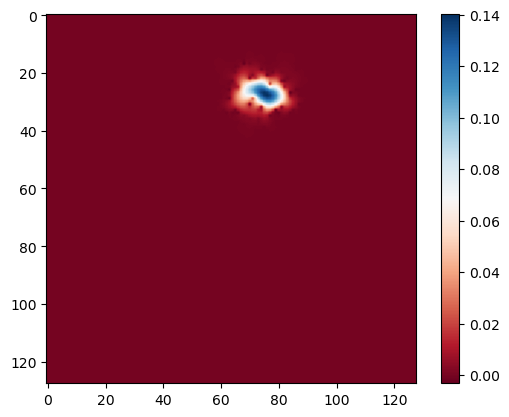

In [9]:
plt.imshow(l.eigV[0].reshape(l.syshape), cmap='RdBu', interpolation=None)
plt.colorbar()

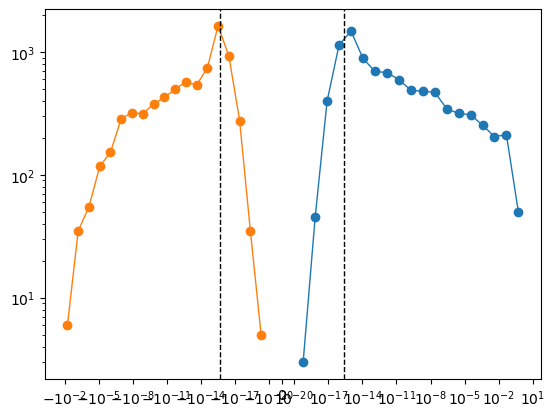

In [10]:
outp, outm = symlog_binning(flip_to_positive_majority(l.eigV[0].flatten()))
plt.plot(outp[0], outp[1], marker='o', lw=1)
plt.plot(outm[0], outm[1], marker='o', lw=1)
plt.xscale('symlog', linthresh=1e-20)
plt.yscale('log')
plt.axvline(np.finfo(np.float64).eps, color='k', linestyle='--', lw=1)
plt.axvline(-np.finfo(np.float64).eps, color='k', linestyle='--', lw=1)

In [14]:
def flip_edges_optimized(graph, fraction=0.5):
    """
    Flips the sign of a fraction of the +1 edges in the graph to -1 using more concise NetworkX functions.

    Parameters:
    - graph: A networkx graph where edges have a 'weight' attribute.
    - fraction: Fraction of +1 weighted edges to flip. Value between 0 and 1.

    Returns:
    - The modified graph with some edges flipped.
    """
    # Ensure the fraction is between 0 and 1
    if not (0 <= fraction <= 1):
        raise ValueError("Fraction must be between 0 and 1.")
    
    # Find all edges with weight +1
    
    # Calculate the number of edges to flip
    num_to_flip = int(graph.number_of_edges() * fraction)
    
    # Randomly select a subset of positive edges to flip
    edges_to_flip = random.sample(list(graph.edges()), k=num_to_flip)
    
    # Prepare a dictionary with the selected edges and their new weight
    flipped_edges = {graph[i][j]: -1 for (i, j) in edges_to_flip}
    
    # Use set_edge_attributes to apply the new weights
    nx.set_edge_attributes(graph, flipped_edges, 'weight')
    
    return graph

In [15]:
G = nx.grid_2d_graph(128, 128, periodic=True)
nx.set_edge_attributes(G, +1, 'weight')
flip_edges_optimized(G, 0.5)

TypeError: unhashable type: 'dict'

In [17]:
G[(0, 0)][(0, 1)]

{'weight': 1}

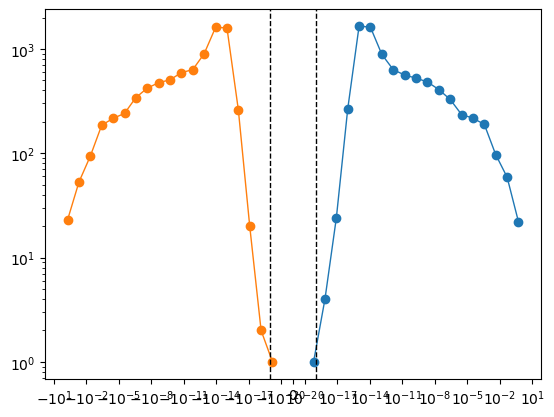

In [3]:


# plt.xlim(-1.5, 1)

In [20]:
np.where(np.isnan(l.eigV[0].flatten()))

(array([], dtype=int64),)

In [23]:
np.isnan(np.logl.eigV[0].flatten()).any()

False